# Currency Foreign Exchange Rates
![](2023-02-09-09-35-08.png)

Image Credits: 


### About Dataset
This is a historical dataset of currency foreign exchange rates. This dataset includes 113 currencies in total with exchange values in varied permutations. It can be used for various task like time series analysis and forecasting. There are approximately 1.4million rows and 7 columns in the dataset.

The data has two main columns in particular:
* slug
* currency
> Slug column is of the form "ABC/PQR" where ABC and PQR are standard active currency codes as of ISO 4217.
>
>Currency contains a currency code which is the unit of the value in the tables. For examples, if slug is JPY/INR and currency is INR it means that
<center>1 JPY = xINR</center>
where x is in INR

The other columns are the regular OHLC (Open - High - Low - Close) columns along with the date


### Load prerequisite libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



In [4]:
data = pd.read_csv("forex.csv")

In [6]:
data.head()

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP


In [7]:
data["A"]=[str(a).split("/")[0] for a in data["slug"]]
data["B"]=[str(a).split("/")[1] for a in data["slug"]]

In [8]:
data.head()

,slug,date,open,high,low,close,currency,A,B
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP,GBP,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP,GBP,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP,GBP,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP,GBP,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP,GBP,EGP


#Check the Possiblities for CurA and CurB

In [9]:
data["A"].unique()

array(['GBP', 'EUR', 'AUD', 'JPY', 'CHF', 'USD', 'INR'], dtype=object)

In [10]:
data["B"].unique()

array(['EGP', 'SCR', 'NOK', 'SZL', 'MYR', 'PKR', 'NZD', 'CUP', 'CAD',
       'CHF', 'ZMW', 'FJD', 'XOF', 'IDR', 'JPY', 'UAH', 'TWD', 'MMK',
       'BRL', 'CNY', 'HUF', 'MXN', 'BMD', 'KWD', 'BBD', 'TTD', 'SEK',
       'BWP', 'HNL', 'CZK', 'ISK', 'LKR', 'USD', 'RON', 'EUR', 'TND',
       'ZAR', 'SGD', 'BYN', 'PEN', 'XPF', 'THB', 'GBP', 'KRW', 'AUD',
       'MOP', 'PGK', 'PHP', 'BSD', 'CRC', 'JOD', 'MZN', 'TRY', 'BGN',
       'DJF', 'COP', 'INR', 'BAM', 'PLN', 'SAR', 'ARS', 'IRR', 'NIO',
       'MWK', 'LBP', 'IQD', 'KES', 'UGX', 'KZT', 'NGN', 'GTQ', 'PYG',
       'ETB', 'SVC', 'VND', 'BND', 'MAD', 'KYD', 'ILS', 'MKD', 'HKD',
       'RUB', 'AED', 'GMD', 'BZD', 'SLL', 'MVR', 'DKK', 'MUR', 'JMD',
       'OMR', 'DZD', 'BOB', 'GHS', 'RSD', 'TZS', 'UZS', 'BDT', 'CLP',
       'MGA', 'QAR', 'ANG', 'HTG', 'BHD', 'ALL', 'BIF', 'SOS', 'MDL',
       'PAB', 'XAF', 'SDG', 'DOP', 'UYU'], dtype=object)

#Choose a CurA

In [11]:
curr_A=input()

In [12]:
A_data=data[data["A"]==curr_A]

check possible curBs

In [13]:
A_data["B"].unique()

array(['SZL', 'PKR', 'FJD', 'MMK', 'BWP', 'RON', 'UAH', 'PEN', 'THB',
       'KRW', 'USD', 'MOP', 'CRC', 'JOD', 'PGK', 'COP', 'AUD', 'BAM',
       'PLN', 'ARS', 'INR', 'CNY', 'SCR', 'SVC', 'MAD', 'PHP', 'KYD',
       'TWD', 'ZAR', 'MKD', 'IRR', 'LBP', 'RUB', 'CHF', 'KES', 'BRL',
       'NZD', 'MYR', 'DKK', 'BMD', 'OMR', 'BGN', 'BOB', 'GHS', 'SGD',
       'CZK', 'BND', 'NOK', 'BSD', 'AED', 'NIO', 'GBP', 'HKD', 'MGA',
       'ANG', 'TND', 'TRY', 'ETB', 'ILS', 'MWK', 'CLP', 'IDR', 'SEK',
       'HNL', 'SAR', 'QAR', 'KZT', 'JPY', 'CAD', 'MXN', 'HUF', 'IQD'],
      dtype=object)

In [14]:
A_data.head()

,slug,date,open,high,low,close,currency,A,B
13493,EUR/SZL,2003-12-01,7.3853,7.3853,7.3853,7.3853,SZL,EUR,SZL
13494,EUR/SZL,2003-12-02,7.3364,7.3364,7.3364,7.3364,SZL,EUR,SZL
13495,EUR/SZL,2003-12-03,7.4502,7.4502,7.4502,7.4502,SZL,EUR,SZL
13496,EUR/SZL,2003-12-04,7.2035,7.2035,7.2035,7.2035,SZL,EUR,SZL
13497,EUR/SZL,2003-12-05,7.3177,7.3177,7.3177,7.3177,SZL,EUR,SZL


In [15]:
A_data.tail()

,slug,date,open,high,low,close,currency,A,B
1434700,EUR/IQD,2021-08-24,1681.119995,1682.260010,1681.119995,1681.119995,IQD,EUR,IQD
1434701,EUR/IQD,2021-08-25,1682.260010,1683.930054,1682.260010,1682.260010,IQD,EUR,IQD
1434702,EUR/IQD,2021-08-26,1683.930054,1687.969971,1683.930054,1683.930054,IQD,EUR,IQD
1434703,EUR/IQD,2021-08-27,1687.969971,1687.969971,1685.619995,1687.969971,IQD,EUR,IQD
1434704,EUR/IQD,2021-08-30,1720.699951,1722.400024,1718.900024,1721.000000,IQD,EUR,IQD


Shapes of all currency combos for choshen cur a

In [16]:
Alist=[]
for b in A_data["B"].unique():
  print(b,A_data[A_data["B"]==b].shape)
  Alist.append(A_data[A_data["B"]==b])

cur_map={x:y for y,x in zip(Alist,A_data["B"].unique())}


SZL (4140, 9)
PKR (4204, 9)
FJD (4562, 9)
MMK (3935, 9)
BWP (4000, 9)
RON (4186, 9)
UAH (3936, 9)
PEN (4000, 9)
THB (3941, 9)
KRW (4596, 9)
USD (4582, 9)
MOP (3935, 9)
CRC (3938, 9)
JOD (4862, 9)
PGK (3935, 9)
COP (4300, 9)
AUD (4599, 9)
BAM (4561, 9)
PLN (4992, 9)
ARS (3937, 9)
INR (4581, 9)
CNY (4595, 9)
SCR (3936, 9)
SVC (4201, 9)
MAD (3655, 9)
PHP (4252, 9)
KYD (3159, 9)
TWD (3968, 9)
ZAR (5549, 9)
MKD (3941, 9)
IRR (1943, 9)
LBP (4430, 9)
RUB (4115, 9)
CHF (4805, 9)
KES (4734, 9)
BRL (4563, 9)
NZD (4599, 9)
MYR (4571, 9)
DKK (4585, 9)
BMD (2235, 9)
OMR (3937, 9)
BGN (4459, 9)
BOB (4299, 9)
GHS (3641, 9)
SGD (4599, 9)
CZK (4582, 9)
BND (4561, 9)
NOK (5548, 9)
BSD (4561, 9)
AED (4594, 9)
NIO (3934, 9)
GBP (5882, 9)
HKD (4582, 9)
MGA (3935, 9)
ANG (2083, 9)
TND (4250, 9)
TRY (4313, 9)
ETB (3934, 9)
ILS (4583, 9)
MWK (3935, 9)
CLP (3936, 9)
IDR (4574, 9)
SEK (5892, 9)
HNL (3935, 9)
SAR (4598, 9)
QAR (3879, 9)
KZT (3999, 9)
JPY (4807, 9)
CAD (4585, 9)
MXN (4589, 9)
HUF (4581, 9)
IQD (3

Choose a Currency B

In [17]:
cur_B=input()

In [18]:
cur_map[cur_B].head()

,slug,date,open,high,low,close,currency,A,B
1430769,EUR/IQD,2006-05-16,1803.072021,1803.072021,1803.072021,1803.072021,IQD,EUR,IQD
1430770,EUR/IQD,2006-05-17,1814.535034,1814.535034,1814.535034,1814.535034,IQD,EUR,IQD
1430771,EUR/IQD,2006-05-18,1797.339966,1797.339966,1797.339966,1797.339966,IQD,EUR,IQD
1430772,EUR/IQD,2006-05-19,1796.090942,1796.090942,1796.090942,1796.090942,IQD,EUR,IQD
1430773,EUR/IQD,2006-05-22,1796.090942,1796.826050,1796.090942,1796.826050,IQD,EUR,IQD


In [19]:
cur_map[cur_B].tail()

,slug,date,open,high,low,close,currency,A,B
1434700,EUR/IQD,2021-08-24,1681.119995,1682.260010,1681.119995,1681.119995,IQD,EUR,IQD
1434701,EUR/IQD,2021-08-25,1682.260010,1683.930054,1682.260010,1682.260010,IQD,EUR,IQD
1434702,EUR/IQD,2021-08-26,1683.930054,1687.969971,1683.930054,1683.930054,IQD,EUR,IQD
1434703,EUR/IQD,2021-08-27,1687.969971,1687.969971,1685.619995,1687.969971,IQD,EUR,IQD
1434704,EUR/IQD,2021-08-30,1720.699951,1722.400024,1718.900024,1721.000000,IQD,EUR,IQD


#Data Preprocessing: Upsampling and forward fill


In [21]:
A_B=cur_map[cur_B]
#Check the number of missing entries
A_B=A_B.set_index(A_B.date)
A_B.index=pd.to_datetime(A_B.date)
start_date=A_B.iloc[0].date
end_date=A_B.iloc[-1].date
print(pd.date_range(start=start_date, end=end_date).difference(A_B.index))

DatetimeIndex(['2006-05-20', '2006-05-21', '2006-05-27', '2006-05-28',
               '2006-06-03', '2006-06-04', '2006-06-10', '2006-06-11',
               '2006-06-17', '2006-06-18',
               ...
               '2021-07-31', '2021-08-01', '2021-08-07', '2021-08-08',
               '2021-08-14', '2021-08-15', '2021-08-21', '2021-08-22',
               '2021-08-28', '2021-08-29'],
              dtype='datetime64[ns]', length=1650, freq=None)


In [22]:
#upsample to weekly records using mean
weekly = A_B.resample('W', label='left',closed = 'left').mean()

print(pd.date_range(start=start_date, end=end_date,freq="W").difference(weekly.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [23]:
#check for null values:
weekly.isnull().sum()

open     6
high     6
low      6
close    6
dtype: int64

In [24]:
#use ffil to fill null values
weekly["close"]=weekly["close"].ffill()

In [25]:
weekly.isnull().sum()

open     6
high     6
low      6
close    0
dtype: int64

In [26]:
weekly.shape

(799, 4)

Plot all features to check if any independant features are present

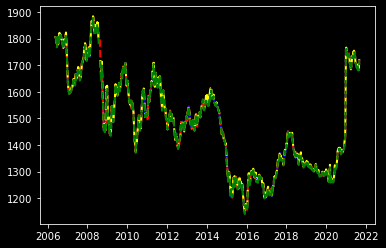

In [27]:
plt.plot(weekly["open"], color='blue', linewidth = 2, linestyle = 'dashed')
plt.plot(weekly["close"], color='red', linewidth = 2, linestyle = 'dashed')
plt.plot(weekly["high"], color='yellow', linewidth = 2, linestyle = 'dashed')
plt.plot(weekly["low"], color='green', linewidth = 2, linestyle = 'dashed')
plt.show()


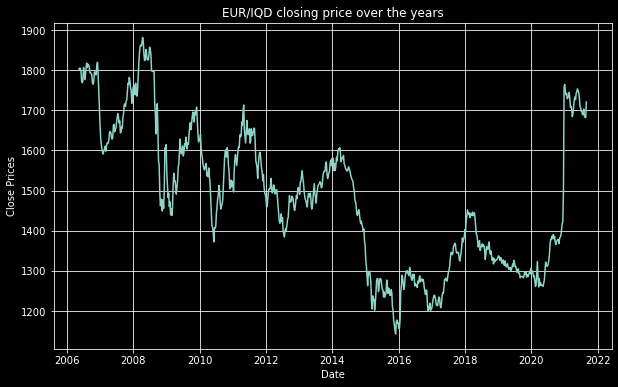

In [28]:
#plot only close price as target
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(weekly['close'])
plt.title(f'{curr_A}/{cur_B} closing price over the years')
plt.show()

<AxesSubplot:ylabel='Density'>

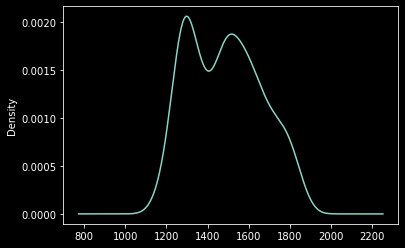

In [29]:
#Analyse the KDE plot of the time series to checks for shape, spread, modes and ouliers
df_close = weekly['close']
df_close.plot(kind='kde')

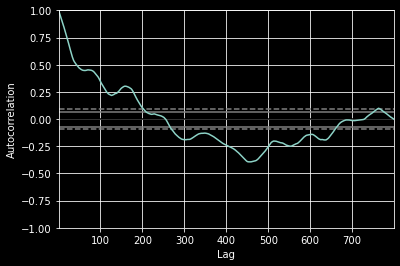

In [30]:
#check for autocorrelation with historic values
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_close)
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

#Visualize the stationarity using rolling stats and check ADF test values

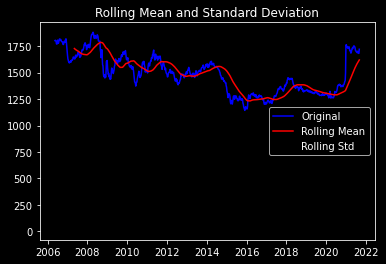

Results of dickey fuller test
Test Statistics                 -2.178086
p-value                          0.214295
No. of lags used                 1.000000
Number of observations used    797.000000
critical value (1%)             -3.438581
critical value (5%)             -2.865173
critical value (10%)            -2.568705
dtype: float64


In [32]:

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(52).mean()
    rolstd = timeseries.rolling(52).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

#Decompose time series to visualize Trends, Seasonalities and Residuals

<Figure size 432x288 with 0 Axes>

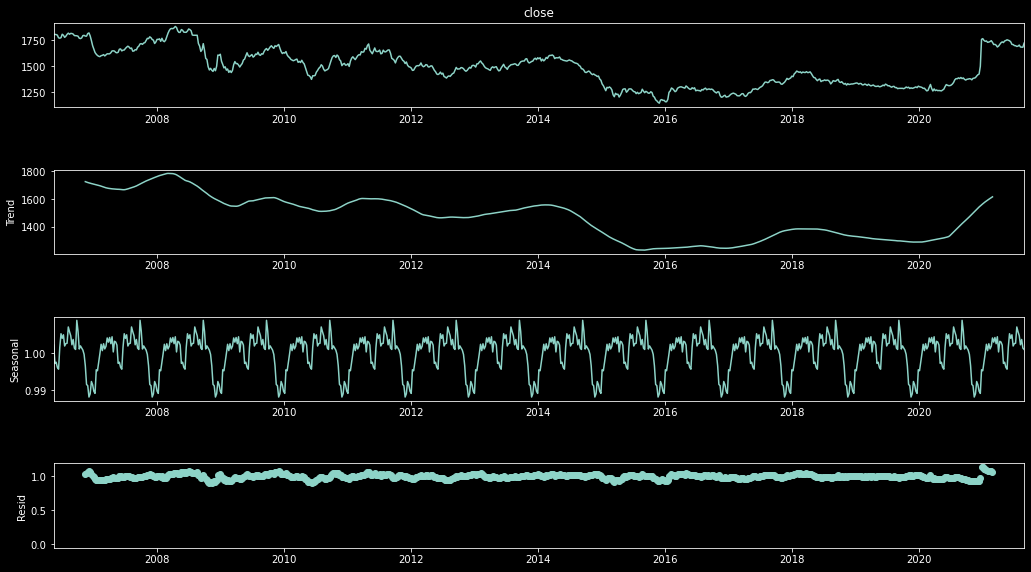

In [33]:

result = seasonal_decompose(df_close, model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


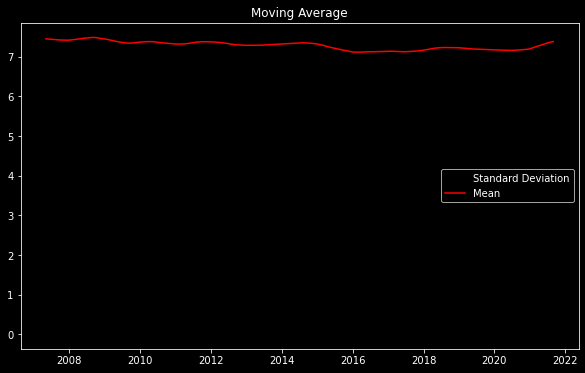

In [34]:
#use log to stabilize the time series and make it stationary
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(52).mean()
std_dev = df_log.rolling(52).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

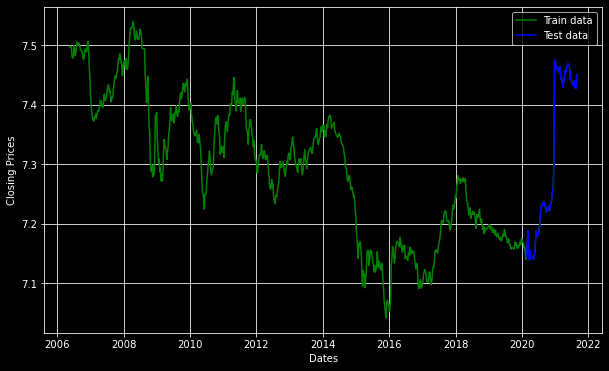

In [35]:
#Split test and train data and visualize
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4293.772, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4321.086, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4318.599, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4294.547, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4319.427, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4319.334, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4317.502, Time=0.88 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4322.245, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-4320.618, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4320.518, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4319.670, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4318.692, Time=0.47 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.171 seconds
                               SARIMAX Results                              

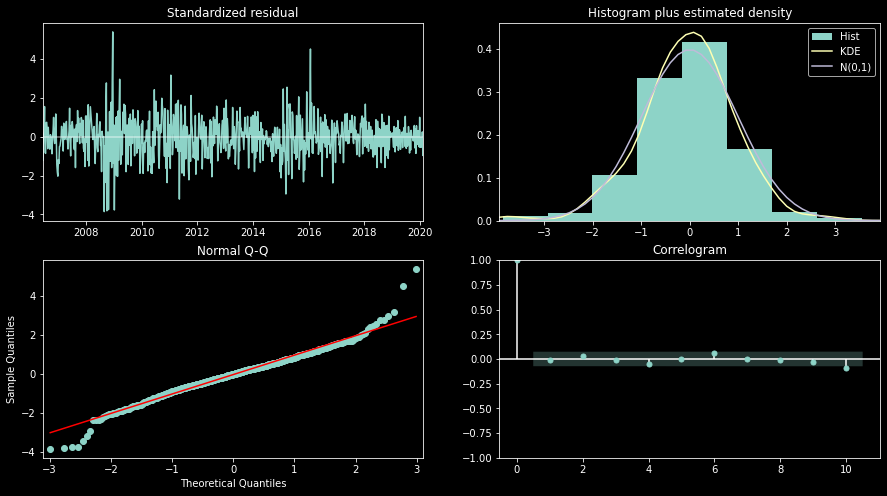

In [36]:
#create an instance of Auto arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  716
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2163.446
Date:                Sat, 11 Feb 2023   AIC                          -4318.891
Time:                        15:55:23   BIC                          -4300.602
Sample:                    06-04-2006   HQIC                         -4311.828
                         - 02-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0377      0.358     -0.105      0.916      -0.739       0.663
ma.L1          0.2353      0.354      0.664      0.507      -0.459       0.930
ma.L2          0.0817      0.069      1.181      0.2

In [38]:
samples=len(test_data)
fc=fitted.forecast(samples, alpha=0.05)

In [39]:
fc_series = pd.Series(fc, index=test_data.index)

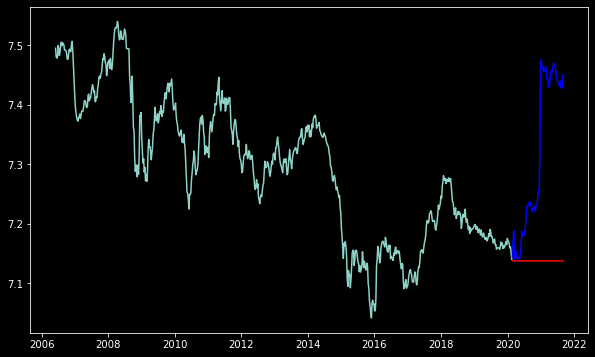

In [40]:
#plot predicted vs actual
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Forex rates')
plt.plot(fc_series, color = 'red',label='Predicted Forex rates')

In [41]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.04729997975335415
MAE: 0.17511715780846937
RMSE: 0.21748558516222208
MAPE: 0.023644659428604723


#Train and test FB prophet and compare the two models to see which performs better

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536664 sha256=89581d66151cf34511a629a86e3dd4a30c269b6b885db99210cd7aea2d7c8839
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [42]:
from prophet import Prophet

In [43]:
train_df=pd.DataFrame(train_data)
train_df["ds"]=train_df.index
train_df["y"]=train_df["close"]

In [44]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=False, weekly_seasonality=True)
model.fit(train_df)

15:56:13 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=len(test_data), freq='W-SUN',include_history=False)
forecast = model.predict(future)

In [46]:
len(forecast["yhat"])

80

In [47]:
fs=pd.Series(forecast["yhat"])
fs.index=forecast.ds
fs

ds
2020-02-23    7.176662
2020-03-01    7.176430
2020-03-08    7.176197
2020-03-15    7.175964
2020-03-22    7.175731
                ...   
2021-08-01    7.159204
2021-08-08    7.158971
2021-08-15    7.158738
2021-08-22    7.158506
2021-08-29    7.158273
Name: yhat, Length: 80, dtype: float64

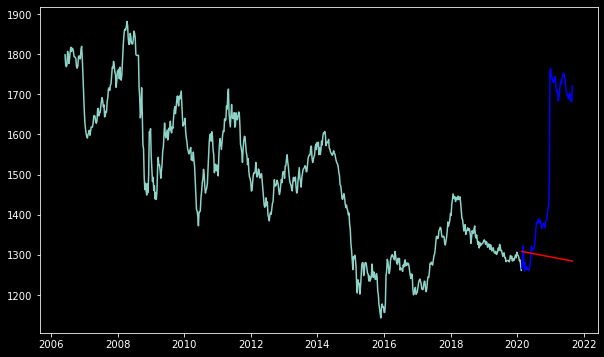

In [48]:
plt.plot(np.exp(train_data), label='training data')
plt.plot(np.exp(test_data), color = 'blue', label='Actual Forex rates')
plt.plot(np.exp(fs), color = 'red',label='Predicted Forex rates')

In [49]:
mse = mean_squared_error(test_data, fs)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fs)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fs))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fs - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.03891441145597244
MAE: 0.15388111536780053
RMSE: 0.19726736034116857
MAPE: 0.02075620137222326


#Results

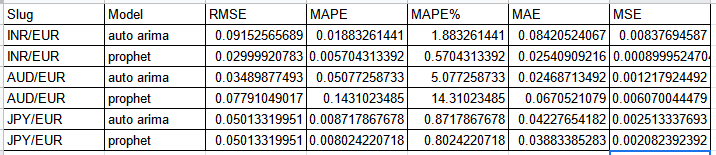